# Feature Engineering / Extraction

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../../data/outliers/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## 1. Phat hien outliers su dung percentile
* Gay bias cho viec xay dung model

In [12]:
# lay moc cua 95% phan bo du lieu
max_threshold = df["Height"].quantile(0.98)
min_threshold = df["Height"].quantile(0.02)

max_threshold, min_threshold

(73.98591718768152, 58.95993803762639)

In [13]:
df[df["Height"] > max_threshold]

,Gender,Height,Weight
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
31,Male,74.033808,212.910225
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
...,...,...,...
4843,Male,74.650540,213.320520
4883,Male,74.210521,204.759344
4913,Male,74.217091,222.829851
4959,Male,74.007963,219.895739


In [14]:
df[df["Height"] < min_threshold]

,Gender,Height,Weight
4794,Male,58.406905,121.338323
5000,Female,58.910732,102.088326
5013,Female,58.895886,101.682613
5014,Female,58.438249,98.192621
5026,Female,56.547975,84.872124
...,...,...,...
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151
9922,Female,58.752489,106.846041


### Xoa Outliers

In [16]:
df[(df["Height"] > min_threshold) & (df["Height"] < max_threshold)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Kham pha voi du lieu bat dong san

In [17]:
min_threshold, max_threshold = df["Height"].quantile([0.02, 0.98])

min_threshold, max_threshold

(58.95993803762639, 73.98591718768152)

In [18]:
a = df[(df["Height"] > min_threshold) & (df["Height"] < max_threshold)]

In [19]:
a.shape

(9600, 3)

## Phat hien va xoa Outliers su dung z-score va do lech chuan (standard deviation)

In [24]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (13, 10)

In [25]:
df = pd.read_csv("../../data/outliers/weight-height.csv")
df.sample(5)

,Gender,Height,Weight
2111,Male,71.960548,208.815056
8727,Female,64.297841,138.597197
2549,Male,72.088107,192.820500
1461,Male,72.128826,216.216815
1886,Male,70.184877,189.915872


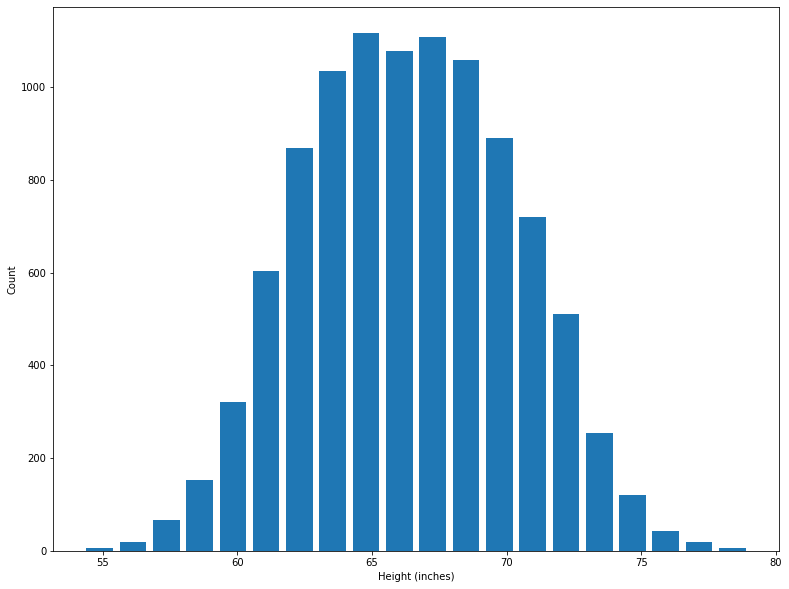

In [26]:
plt.hist(df["Height"], bins=20, rwidth=0.8)
plt.xlabel("Height (inches)")
plt.ylabel("Count")
plt.show()

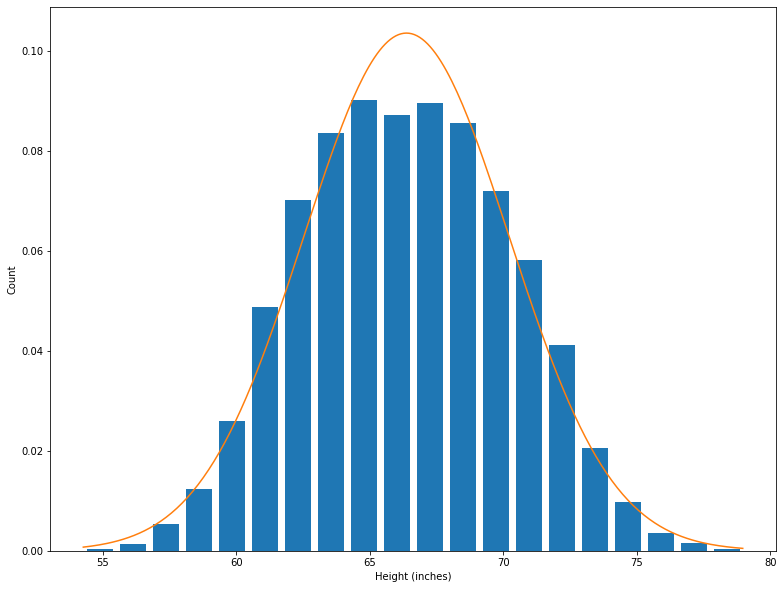

In [28]:
from scipy.stats import norm
import numpy as np

plt.hist(df["Height"], bins=20, rwidth=0.8, density=True)
plt.xlabel("Height (inches)")
plt.ylabel("Count")

rng = np.arange(df["Height"].min(), df["Height"].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df["Height"].mean(), df["Height"].std()))

plt.show()

In [29]:
df["Height"].mean(), df["Height"].std()

(66.36755975482124, 3.8475281207732293)

### (1) Phat hien va xoa Outlier su dung 3 do lech chuan

In [30]:
upper_limit = df["Height"].mean() + 3 * df["Height"].std()
lower_limit = df["Height"].mean() - 3 * df["Height"].std()

upper_limit, lower_limit

(77.91014411714093, 54.82497539250156)

In [33]:
print("Outlier data")

display(df[(df["Height"] < lower_limit) | (df["Height"] > upper_limit)])

Outlier data


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


### (2) Phat hien va xoa Outlier su dung Z-score

In [34]:
df["z_score"] = (df["Height"] - df["Height"].mean()) / (df["Height"].std())

In [37]:
df["z_score"].max(), df["z_score"].min()

(3.282934443902102, -3.146026760498775)

In [39]:
# chon theo tieu chuan cac diem ((z_score < 3) and (z_score > -3))
df[(df["z_score"] > -3) & (df["z_score"] < 3)]

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


## Su dung IQR

In [42]:
import pandas as pd
import numpy as np 

df = pd.read_csv("../../data/outliers/weight-height.csv")

In [44]:
Q1 = df["Height"].quantile(0.25)
Q3 = df["Height"].quantile(0.75)

Q1, Q3

(63.505620481218955, 69.1742617268347)

In [46]:
IQR = Q3 - Q1 
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [47]:
# Loai bo cac gia tri outlier limit
df[(df["Height"] > lower_limit) & (df["Height"] < upper_limit)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
